# Описание проекта #

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.


Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

**Часть 1. Приоритизация гипотез.**

In [6]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [8]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150  

In [9]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
hypothesis['ICE'] = np.round(hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'], 2)

In [6]:
hypothesis.loc[:, ['Hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [7]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis.loc[:, ['Hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [8]:
def color_red(val):
    color = 'red' if val > 10 else 'black'
    return 'color: %s' % color

hypothesis_results = hypothesis.loc[:, ['Hypothesis', 'ICE', 'RICE']]
hypothesis_results.style.applymap(color_red, subset = ['ICE','RICE'])

,Hypothesis,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,4
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7,56
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1,3
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8,40
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2,112
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.2


**ВЫВОД:**

При анализе показателя ICE наиболее перспективные гипотезы: "Запустить акцию, дающую скидку на товар в день рождения", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" и "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". 

При анализе показателя RICE: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",  "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	" и "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию". Так получилось, потому что у гипотез "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	" высокие показатели охвата пользователей: 10 и 8 (у гипотезы "Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар" так же высокий показатель охвата, но коэф. затраты - тоже высокий, поэтому RICE получается низким). 

**Часть 2. Анализ A/B-теста**

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

In [9]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
# приведем значения параметра date к дате
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [12]:
orders.sample(5)

,transactionId,visitorId,date,revenue,group
260,364342391,2849720983,2019-08-02,2355,B
575,212815314,2054014923,2019-08-04,5249,A
31,2552245563,3024988998,2019-08-15,383,B
477,2939332152,3245907439,2019-08-24,19280,B
316,4226817726,1349865791,2019-08-19,2490,A


In [13]:
orders.duplicated().sum()

0

In [14]:
visitorsA = orders[orders['group'] == 'A']['visitorId']
visitorsB = orders[orders['group'] == 'B']['visitorId']
visitorsDup = pd.Series(np.intersect1d(visitorsA, visitorsB)) 
print('Всего {} пользователей, покоторые попали в обе группы'.format(len(visitorsDup)))

Всего 58 пользователей, покоторые попали в обе группы


In [15]:
visitorsAA = orders[orders['group'] == 'A']['visitorId'].drop_duplicates().to_frame()
visitorsBB = orders[orders['group'] == 'B']['visitorId'].drop_duplicates().to_frame()
visitorsDupp = visitorsAA.merge(visitorsBB, how = 'inner')
visitorsDupp.shape[0]

58

In [15]:
# удалим заказы пользователей, которые попали в обе группы. 
print('Такие пользователи сделали {} заказаков на сумму {}'.format(orders.query('visitorId in @visitorsDup').shape[0], orders.query('visitorId in @visitorsDup')['revenue'].sum()))

Такие пользователи сделали 181 заказаков на сумму 1558935


In [16]:
print('Всего {} пользователей, которые сделали {} заказаков на сумму {}'.format(len(orders['visitorId'].unique()), orders.shape[0], orders['revenue'].sum()))

Всего 1031 пользователей, которые сделали 1197 заказаков на сумму 9992563


In [17]:
print('Данные по заказам за период {:%d-%m-%Y} - {:%d-%m-%Y}'.format(orders['date'].min(), orders['date'].max()))

Данные по заказам за период 01-08-2019 - 31-08-2019


In [18]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [19]:
# приведем значения параметра date к дате
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [20]:
visitors.duplicated().sum()

0

In [21]:
print('Данные по просмотрам за период {:%d-%m-%Y} - {:%d-%m-%Y}'.format(visitors['date'].min(), visitors['date'].max()))

Данные по просмотрам за период 01-08-2019 - 31-08-2019


In [22]:
visitors.sample(5)

,date,group,visitors
13,2019-08-14,A,735
5,2019-08-06,A,667
4,2019-08-05,A,756
57,2019-08-27,B,720
21,2019-08-22,A,609


**Шаг 1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.**

In [23]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [24]:
# добавим в массив накопительную сумму по кол-ву тразцакций, кол-ву посетителей и выручки
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [25]:
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [26]:
# добавим в массив накопительную сумму по кол-ву посетителей 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [27]:
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [28]:
# объединим данные по дате и группе
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


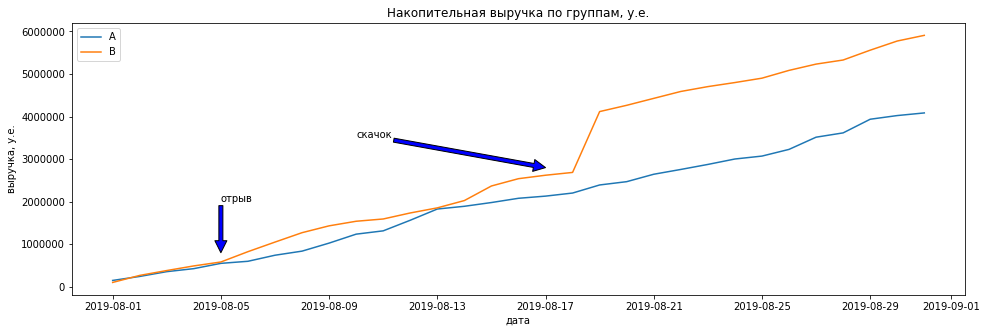

In [29]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'visitors', 'orders', 'buyers']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'visitors', 'orders', 'buyers']]

plt.figure(figsize=(16, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Накопительная выручка по группам, у.е.')
plt.xlabel("дата")
plt.ylabel("выручка, у.е.")
plt.annotate('скачок', xy=('2019-08-17', 2800000), xytext=('2019-08-10', 3500000),
            arrowprops=dict(facecolor='b'))
plt.annotate('отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),
            arrowprops=dict(facecolor='b')) 
plt.legend();

**ВЫВОД:**

Выручка немного колеблится в начале, но рост становится равномерным к концу теста. Накопительная выручка группы В итого выше выручки группы А, но это может быть связано со скачком в росте для группы В: 19го августа наблюбается резкий рост, что похоже на наличие дорогих заказов. В группе А тоже можно определить небольшой выброс в районе 13 августа. 

**Шаг 2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.**

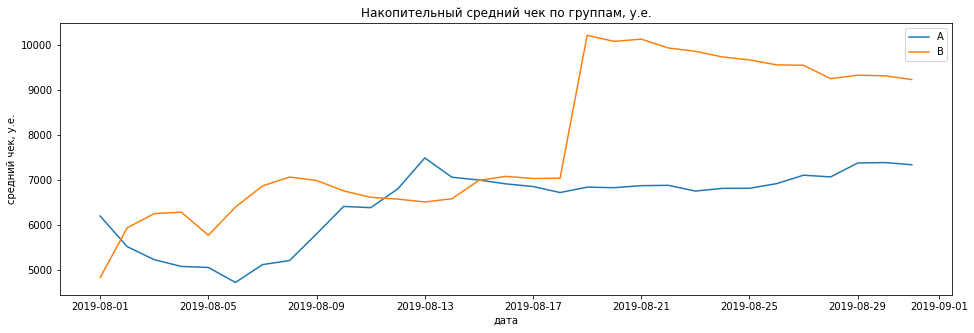

In [30]:
plt.figure(figsize=(16, 5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Накопительный средний чек по группам, у.е.')
plt.xlabel("дата")
plt.ylabel("средний чек, у.е.")
plt.legend(); 

**ВЫВОД:**

В начале теста средний чек колеблится, выравнивается в концу теста, тем не менее средний чек для группы А медленно растет, а для группы В показывает отрицательную динамику. Также как и для выручки здесь видны выбросы: 8 августа для группы А и 19 августа для группы В.

**Шаг 3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.**

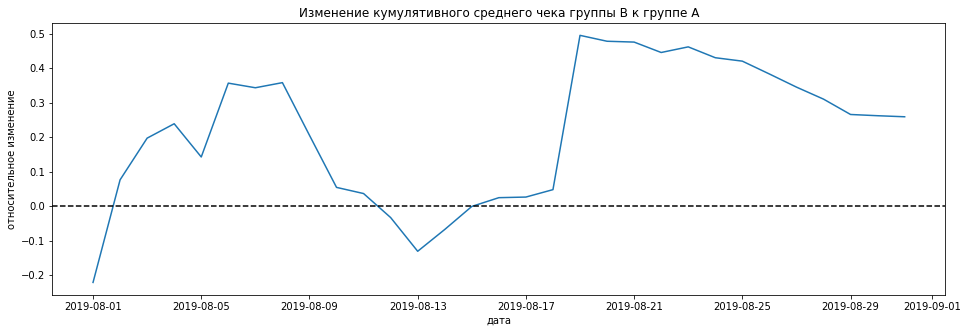

In [31]:
# объединим данные по группам в общую таблицу
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
 
plt.figure(figsize=(16, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel("дата")
plt.ylabel("относительное изменение")
plt.axhline(y=0, color='black', linestyle='--');

**ВЫВОД:**

График доказывает предыдущие выводы: накопительный средний чек группы В лучше группы А, тем не менее есть выбросы/колебания 8 и 19 августа: 8 августа накопительный средний чек группы А резко увеличивается, а 18 - группы В. Но итого накопительный средний чек группы В выше среднего чека группы А, но тенценция убывающая. 

**Шаг 4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.**

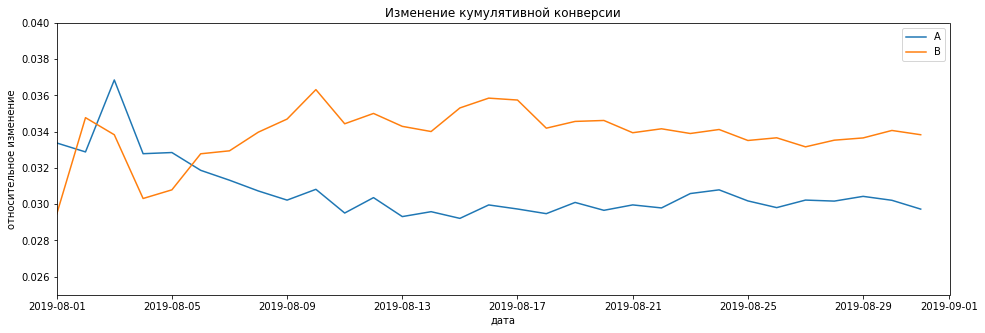

In [32]:
# расчитаем конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(16, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Изменение кумулятивной конверсии')
plt.axis(['2019-08-01', '2019-09-01', 0.025, 0.04]) 
plt.xlabel("дата")
plt.ylabel("относительное изменение")
plt.legend();


**ВЫВОД:**

Пользователи группы В чаще делают заказы.
    

**Шаг 5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.**

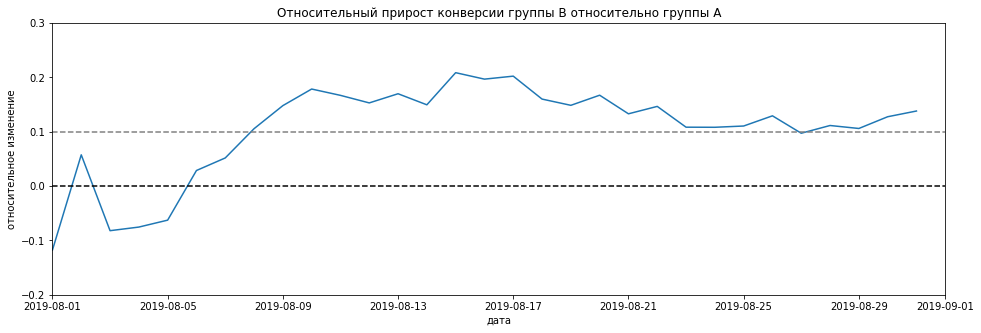

In [33]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(16, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.xlabel("дата")
plt.ylabel("относительное изменение")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis(['2019-08-01', '2019-09-01', -0.2, 0.3]);

**Вывод:**

Конверсия группы В лучше конверсии группы на более 10%.

**Шаг 6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.**

In [34]:
orders.sample(5)

,transactionId,visitorId,date,revenue,group
928,2894657060,204675465,2019-08-30,33050,B
476,457171476,1377447894,2019-08-28,300,B
1133,2645975327,1285103033,2019-08-13,5440,B
931,2575492995,4144979507,2019-08-27,420,A
474,2004946059,1637811943,2019-08-28,1000,B


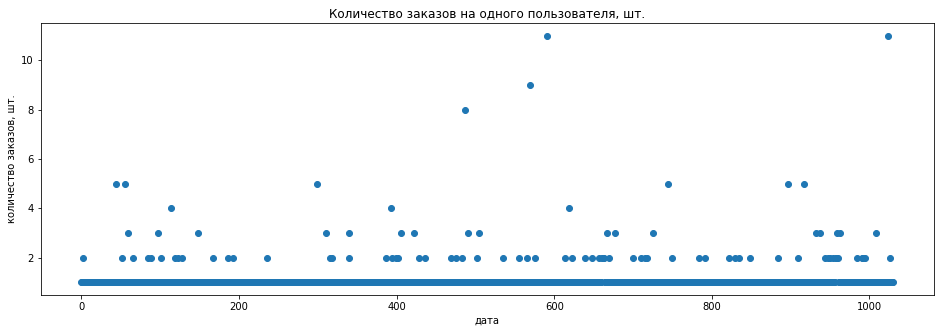

In [35]:
ordersByUsers = (orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsers.columns = ['userId', 'orders']

plt.figure(figsize=(16, 5))
plt.title('Количество заказов на одного пользователя, шт.')
plt.xlabel("дата")
plt.ylabel("количество заказов, шт.")
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']);

**Вывод:**

Большинство пользователей делает 1 заказ, тем не менее есть выбросы в 8-12 заказов.

**Шаг 7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.**

In [55]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 2. 3. 4. 5.]


**Вывод:** 

90% пользователей делают по одному заказу, 5% делают не более 2х, 4% - 3 и 4 заказа, и всего лишь 1% делает более 4х заказов. 
Определим пользователей, сделавший более 5 заказов и более как аномальными. 

**Шаг 8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.**

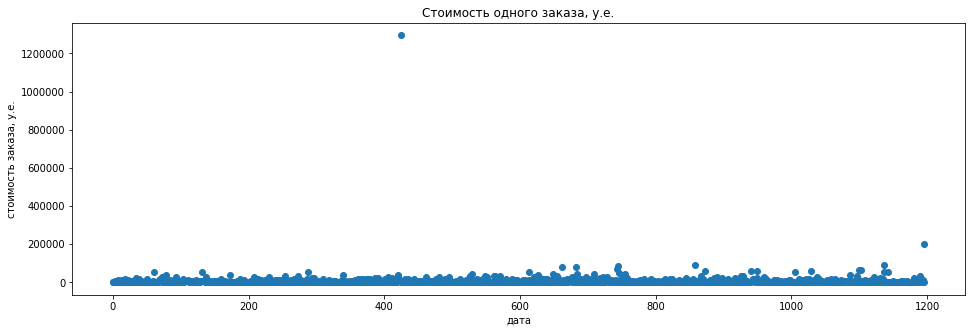

In [37]:
plt.figure(figsize=(16, 5))
plt.title('Стоимость одного заказа, у.е.')
plt.xlabel("дата")
plt.ylabel("стоимость заказа, у.е.")
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);

**Шаг 9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.**

[18168.  28000.  58233.2]


**Вывод:** 

Не более 5% заказов дороже 28 000 у.е. и не более 1% дороже 58 233 у.е.. Определим заказы со стоимостью более 60 000 у.е. как аномальные. 

**Шаг 10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.**

In [39]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [40]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 


Сформилируем и проверим гипотезы:

1. Нулевая гипотеза: распределения значений (конверсия, средний чек) группы А и группы В равны
2. Обратная гипотеза: распределения значений (конверсия, средний чек) группы А и группы В не равны

In [41]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.4f}".format(stats.mannwhitneyu(sampleA, sampleB)[1], alternative = 'two-sided'))

print("{0:.4f}".format(sampleB.mean() / sampleA.mean() - 1))

0.0084
0.1381


**Вывод:** 
    
р-value = 0.0084 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. По сырым данные различие в ковенрсии есть. Однако, относительный выигрыш группы В равен 13.81%.

**Шаг 11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.**

In [42]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729
0.259


**ВЫВОД:** 

р-value = 0.729 больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, не отвергаем. По сырым данные различие в среднем чеке нет. Однако, средний чек группа В лучше среднего чека на 25,9%.

**Шаг 11. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.**

In [43]:
# Примем за аномальных пользователей тех, кто совершил более 4 заказов или совершил заказ дороже 30 000 рублей. 
# Так мы отсечем 1% пользователей, которые совершили более 4 заказов, и 5% пользователей, 
# которые совершили заказ на сумму более 30 000 у.е.

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['userId'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > 60000]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print('Всего {} пользователей, совершивших более 4х заказов или заказ на сумму более 30 000 у.е'.format(abnormalUsers.shape[0]))


Всего 14 пользователей, совершивших более 4х заказов или заказ на сумму более 30 000 у.е


In [44]:
ordersFiltered = orders[np.logical_not(orders['visitorId'].isin(abnormalUsers))]

ordersByUsersFilteredA = (
    ordersFiltered[ordersFiltered['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersFilteredA.columns = ['userId', 'orders']

ordersByUsersFilteredB = (
    ordersFiltered[ordersFiltered['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersFilteredB.columns = ['userId', 'orders'] 

In [45]:
sampleFilteredA = pd.concat(
    [
        ordersByUsersFilteredA['orders'],
        pd.Series(
            0,
            index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])),
            name='orders',
        ),
    ],
    axis=0,
)

sampleFilteredB = pd.concat(
    [
        ordersByUsersFilteredB['orders'],
        pd.Series(
            0,
            index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.5f}".format(stats.mannwhitneyu(sampleFilteredA, sampleFilteredB, alternative = 'two-sided')[1]))
print("{0:.3f}".format(sampleFilteredB.mean() / sampleFilteredA.mean() - 1))

0.01327
0.155


**Вывод:** 
    
P-value = 0.01327 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Результат не изменился: различие между коверсиями есть. 

**Шаг 13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.**

In [46]:
print('{0:.3f}'.format(stats.mannwhitneyu(ordersFiltered[ordersFiltered['group']=='A']['revenue'], ordersFiltered[ordersFiltered['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print('{0:.3f}'.format(ordersFiltered[ordersFiltered['group']=='B']['revenue'].mean()/ordersFiltered[ordersFiltered['group']=='A']['revenue'].mean()-1)) 

0.814
0.007


**Вывод:**

P-value = 0.814 больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, не отвергаем. Результат не изменился: различий между средним чеком нет. Однако, относительный показатель резко изменился: если по сырым данным относительное изменение среднего чека группы В к А было 25,9%, то по ощиченным данным составляет 7%. 

**Шаг 14. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.**

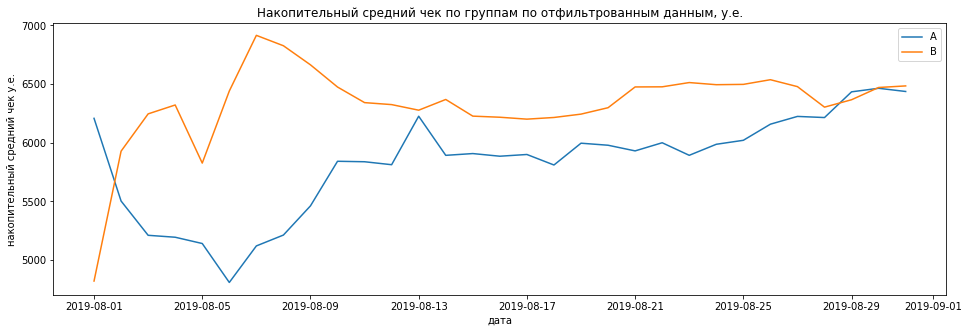

In [47]:
# посмотрим на изменение накопительного среднего чека по отфильтрованным данным

ordersFilteredAggregated = datesGroups.apply(lambda x: ordersFiltered[np.logical_and(ordersFiltered['date'] <= x['date'], ordersFiltered['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeDataFiltered = ordersFilteredAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeDataFiltered.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeRevenueFilteredA = cumulativeDataFiltered[cumulativeDataFiltered['group']=='A'][['date','revenue', 'visitors', 'orders', 'buyers']]
cumulativeRevenueFilteredB = cumulativeDataFiltered[cumulativeDataFiltered['group']=='B'][['date','revenue', 'visitors', 'orders', 'buyers']]

plt.figure(figsize=(16, 5))

plt.plot(cumulativeRevenueFilteredA['date'], cumulativeRevenueFilteredA['revenue']/cumulativeRevenueFilteredA['orders'], label='A')
plt.plot(cumulativeRevenueFilteredB['date'], cumulativeRevenueFilteredB['revenue']/cumulativeRevenueFilteredB['orders'], label='B')
plt.title('Накопительный средний чек по группам по отфильтрованным данным, у.е.')
plt.xlabel("дата")
plt.ylabel("накопительный средний чек у.е.")
plt.legend(); 

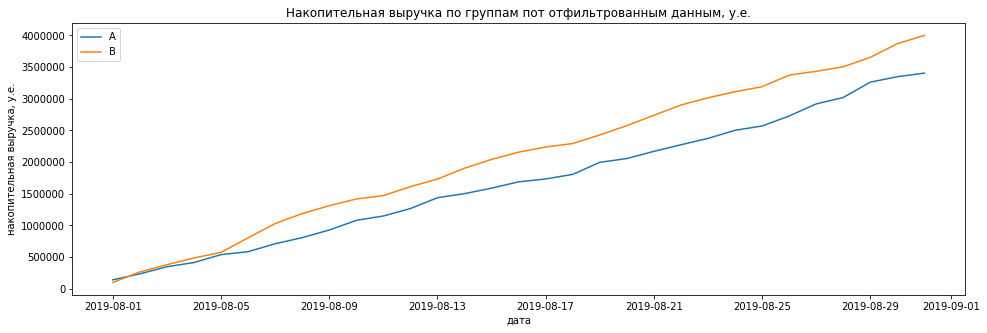

In [48]:
# посмотрим на изменение накопительной выручки по отфильтрованным данным
plt.figure(figsize=(16, 5))

plt.plot(cumulativeRevenueFilteredA['date'], cumulativeRevenueFilteredA['revenue'], label='A')
plt.plot(cumulativeRevenueFilteredB['date'], cumulativeRevenueFilteredB['revenue'], label='B')
plt.title('Накопительная выручка по группам пот отфильтрованным данным, у.е.')
plt.xlabel("дата")
plt.ylabel("накопительная выручка, у.е.")
plt.legend(); 

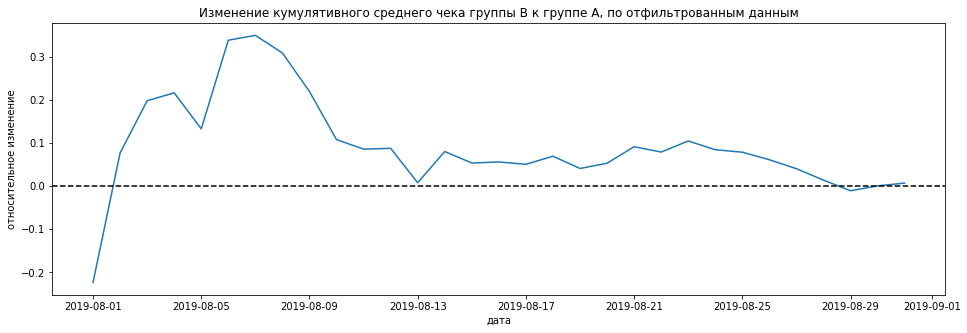

In [49]:
# посмотрим на изменение относительное изменение среднего чека по отфильтрованным данным
mergedCumulativeRevenueFiltered = cumulativeRevenueFilteredA.merge(cumulativeRevenueFilteredB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
 
plt.figure(figsize=(16, 5))
plt.plot(mergedCumulativeRevenueFiltered['date'], (mergedCumulativeRevenueFiltered['revenueB']/mergedCumulativeRevenueFiltered['ordersB'])/(mergedCumulativeRevenueFiltered['revenueA']/mergedCumulativeRevenueFiltered['ordersA'])-1)
plt.title('Изменение кумулятивного среднего чека группы B к группе A, по отфильтрованным данным')
plt.xlabel("дата")
plt.ylabel("относительное изменение")
plt.axhline(y=0, color='black', linestyle='--');

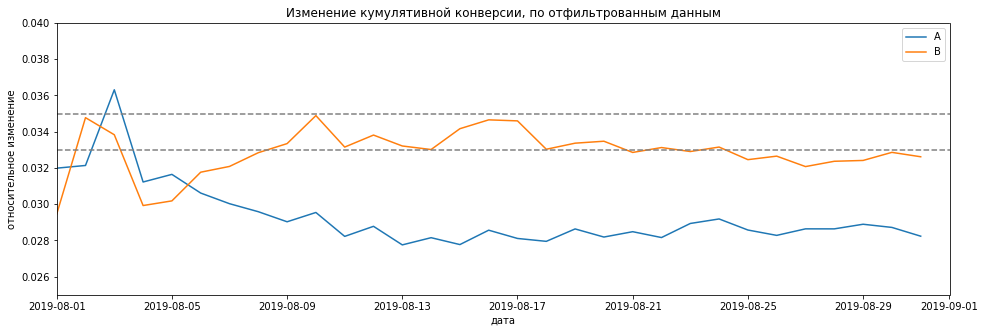

In [50]:
cumulativeDataFiltered['conversion'] = cumulativeDataFiltered['orders']/cumulativeDataFiltered['visitors']

cumulativeDataFilteredA = cumulativeDataFiltered[cumulativeData['group']=='A']
cumulativeDataFilteredB = cumulativeDataFiltered[cumulativeData['group']=='B']

plt.figure(figsize=(16, 5))
plt.plot(cumulativeDataFilteredA['date'], cumulativeDataFilteredA['conversion'], label='A')
plt.plot(cumulativeDataFilteredB['date'], cumulativeDataFilteredB['conversion'], label='B')
plt.title('Изменение кумулятивной конверсии, по отфильтрованным данным')
plt.xlabel("дата")
plt.ylabel("относительное изменение")
plt.axhline(y=0.035, color='grey', linestyle='--')
plt.axhline(y=0.033, color='grey', linestyle='--')
plt.axis(['2019-08-01', '2019-09-01', 0.025, 0.040]) 
plt.legend();

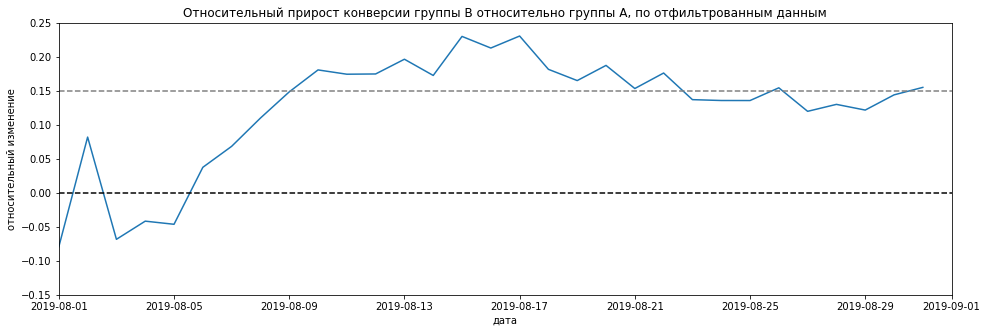

In [51]:
mergedCumulativeConversionsFiltered = cumulativeDataFilteredA[['date','conversion']].merge(cumulativeDataFilteredB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(16, 5))
plt.plot(mergedCumulativeConversionsFiltered['date'], mergedCumulativeConversionsFiltered['conversionB']/mergedCumulativeConversionsFiltered['conversionA']-1)
plt.title('Относительный прирост конверсии группы B относительно группы A, по отфильтрованным данным')
plt.xlabel("дата")
plt.ylabel("относительный изменение")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis(['2019-08-01', '2019-09-01', -0.15, 0.25]);

**ОБЩИЙ ВЫВОД:**

1. При анализе показателя ICE наиболее перспективные гипотезы: 
    + Запустить акцию, дающую скидку на товар в день рождения
    + Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
    + Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок 

2. При анализе показателя RICE: 
     + Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
     + Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа 
     + Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
     + Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию 


3. **В данные есть 58 пользователей, которые попали в обе группы (необходимо проверить данные).**


4. При анализе А/В теста: 
    + Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
    + Нет статистически значимого различия по среднему чеку между группами как по сырым данным, так и после фильтрации аномалий.
    + По графику различия конверсии между группами можно сделать вывод, что уже через неделю после начала теста, результаты группы В стали лучше группы А, но в целом тенценция падающая.

Исходя из полученных данных тест можно остановить и признать его успешным: хоть статистически значимых различий между средним чеком нет, коверсия группы В выше конверсии группы А, а это даст большую выручку в будущем. 